Baseline Mdel for Warengruppe 6 Using linear Regression Ridge Regression model

based on IntroMLandLinReg.ipynb

Import Data and create dataframe, replace Nans with 0 and fit a linear regression model and give the resultig parameter.

In [1]:
%pip install statsmodels
# Import necessary libraries
import pandas as pd  # For data manipulation and handling
import statsmodels.formula.api as smf  # For statistical modeling
from datetime import datetime
import numpy as np

#Laden des merged_data.csv
merged_data_csv = "/workspaces/DS_ML_Gr_1.5/2_BaselineModel/merged_data_new.csv"
df_merged_data = pd.read_csv(merged_data_csv)

# Fehlende Werte (NaN) durch 0 ersetzen
df_merged_data = df_merged_data.replace(to_replace=r'NaN', value='0', regex=True)
df_merged_data = df_merged_data.replace(to_replace=r'^-$', value='0', regex=True)
df_filled = df_merged_data.fillna(0)

#Bennenung der Warengruppne für dataframe Namen
warengruppe_namen = {
    1: 'Brot',
    2: 'Broetchen',
    3: 'Crossaint',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Ursprüngliche DataFrames filtern nach Warengruppe
warengruppe_dataframes = {}
for i, name in warengruppe_namen.items():
    var_name = f"df_{name}_W{i}"  # Name erstellen nach: df_Brot_W1
    warengruppe_dataframes[var_name] = df_filled[
        (df_filled['Warengruppe'] == i) &
        (df_filled['Datum'] <= '2018-07-31')
    ]

# Daten bis 2019-07-31 unabhängig der Warengruppe hinzufügen
new_data = df_filled[
    (df_filled['Datum'] > '2018-07-31') &
    (df_filled['Datum'] <= '2019-08-31')
]

for var_name, df in warengruppe_dataframes.items():
    updated_df = pd.concat([df, new_data], ignore_index=True)
    globals()[var_name] = updated_df

data=df_Saisonbrot_W6
print(data.tail())    

# Fit a linear regression model
# - 'Umsatz' is the dependent variable (target) we aim to predict.
# - 'Warengruppe' represents the size of neighboring lots (continuous feature). (Stimmt zwar nicht, aber erstmal so als Beispiel)
# - 'C(Wochentag)' treats the 'Wochentag' feature as a categorical variable.
mod = smf.ols('Umsatz ~ Inflationsrate+C(Heimspiel)+C(Weihnachtsmarkt)+C(Markt)+Faehrverkaehr+Kreuzfahrverkehr+Temperatur+C(Monat)+ C(Frühling)+C(Sommer)+C(Herbst)+C(Winter)+C(Temp_warm)+C(Temp_cold)+C(Temp_average)+ C(Monday)+C(Tuesday)+C(Wednesday)+C(Thursday)+C(Friday)+C(Saturday)+C(Sunday)+C(Schulferien)+C(Semesterferien)+C(Feiertage)+Niederschlag+Schneehoehe+Sonnenschein+C(Werktag)', data=data).fit()

# Output the summary of the fitted model
# The summary includes key metrics such as R-squared, coefficients, and p-values.
print(mod.summary())


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
          Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  \
652  2019-07-27            1.43        1.0              0.0    0.0   
653  2019-07-28            1.43        0.0              0.0    0.0   
654  2019-07-29            1.43        0.0              0.0    0.0   
655  2019-07-30            1.43        0.0              0.0    0.0   
656  2019-07-31            1.43        0.0              0.0    0.0   

    Faehrverkaehr  Kreuzfahrverkehr  Temperatur  Monat Jahreszeit  ...  \
652             0               0.0     23.5375      7     Sommer  ...   
653             0               0.0     23.3500      7     Sommer  ...   
654             0               0.0     25.2500      7     Sommer  ...   
655             0               0.0     20.7375      7     Sommer  ...   
656             0               

This script builds and evaluates a multiple linear regression model to the target variable
based on selected features.
The dataset is scaled, split into training and testing sets, and visualized using error analysis plots.

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     28.30
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           3.27e-25
Time:                        20:36:01   Log-Likelihood:                -1092.0
No. Observations:                 236   AIC:                             2198.
Df Residuals:                     229   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              31.1592     11.752     

/tmp/ipykernel_1732/3129823710.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


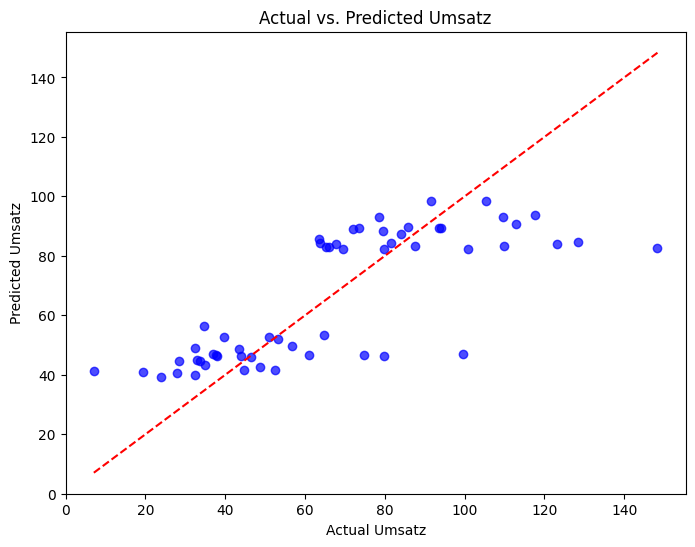

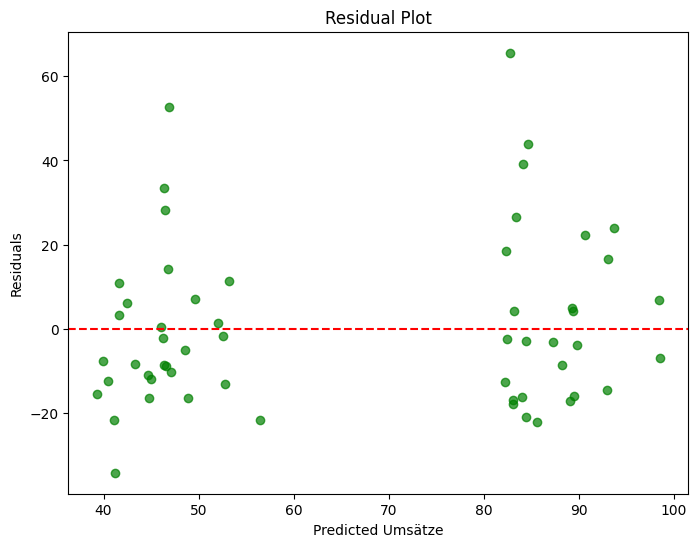

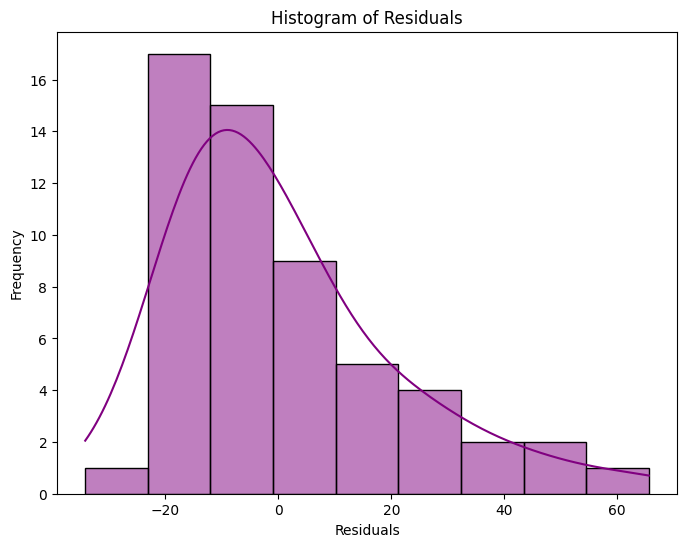

/tmp/ipykernel_1732/3129823710.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")


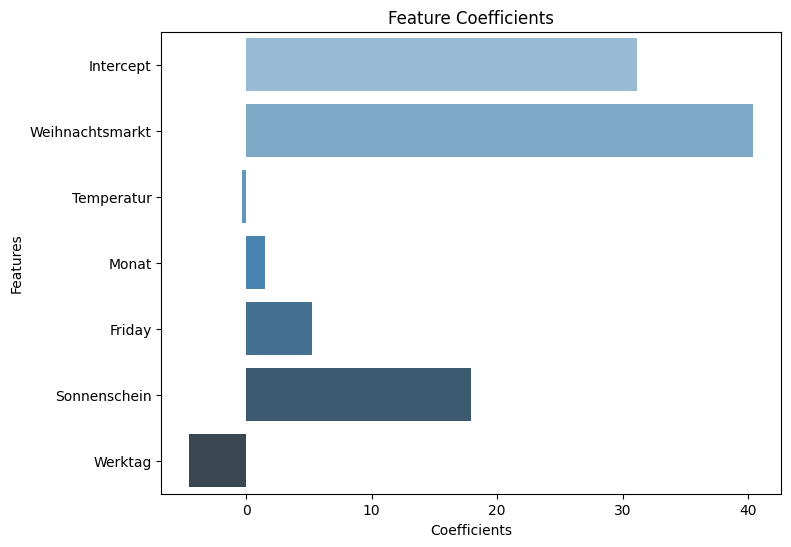

In [2]:
# Import necessary libraries
import pandas as pd  # Data manipulation and handling
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Advanced data visualizations

# Load the dataset 

data=data

# Select features and target variable
# Features include the different Warengruppen, Monday y/n
features = ['Weihnachtsmarkt','Temperatur','Monat' ,'Friday','Sonnenschein','Werktag']
X = data[features] #target variable: Umsatz
y=data['Umsatz']

# Scale the feature data to standardize the range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_test=X_validation = validation_data[features]
y_test=y_validation = validation_data['Umsatz']


# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(X_train)

# Train the linear regression model using Statsmodels
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)  # Add constant to test set for predictions
predictions = model.predict(X_test.astype(float))
print("Predictions for test data:", predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((y_test - predictions) / y_test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Scatter plot: Actual vs. Predicted Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsatz")
plt.ylabel("Predicted Umsatz")
plt.title("Actual vs. Predicted Umsatz")
plt.show()

# Calculate residuals (differences between actual and predicted Umsätze)
residuals = y_test - predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

This script uses a Stochastic Gradient Descent (SGD) regressor to the taget variable
based on selected features.
The dataset is split into training and testing sets, and the model is evaluated using various
error metrics and visualizations.

/tmp/ipykernel_1732/727549071.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


Mean Absolute Error (MAE): 16.16
Mean Squared Error (MSE): 518.41
Mean Absolute Percentage Error (MAPE): 29.52%


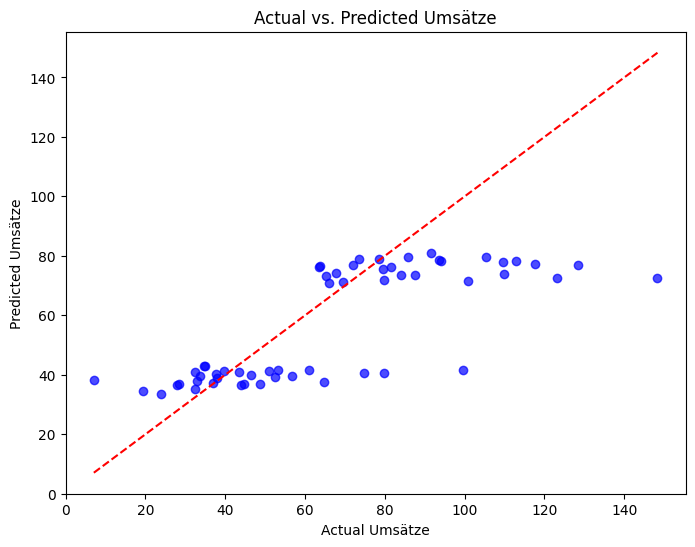

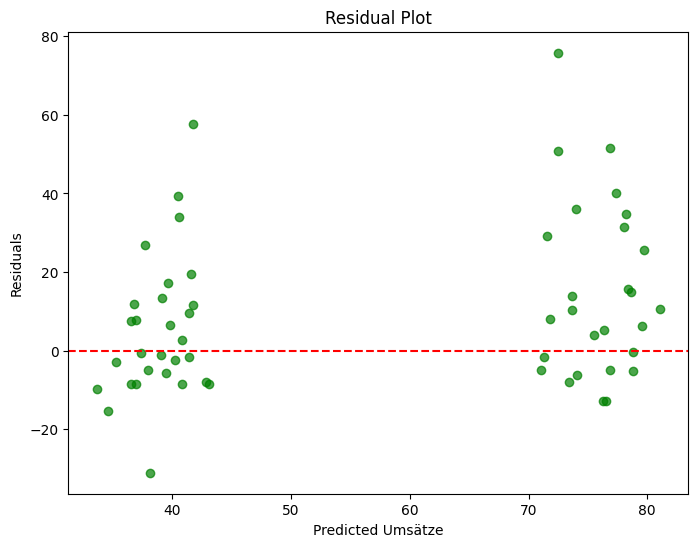

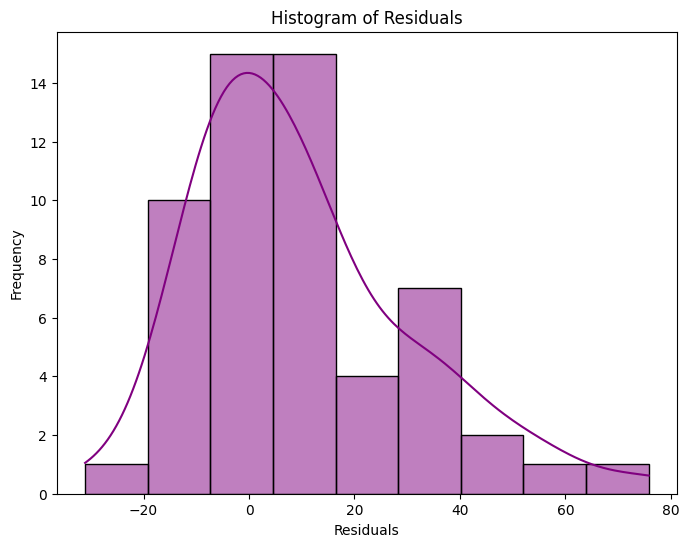

/tmp/ipykernel_1732/727549071.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")


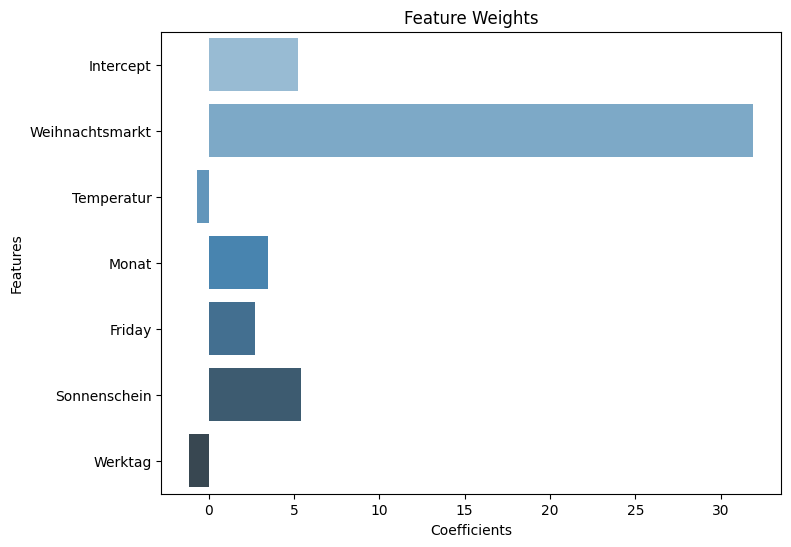

In [3]:
# Import necessary libraries
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

# Load the dataset

data = data

# Select features and target variable
features = ['Weihnachtsmarkt','Temperatur','Monat' ,'Friday','Sonnenschein','Werktag']
X = data[features]
y = data['Umsatz']  # Target variable: Umsatz

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_test=X_validation = validation_data[features]
y_test=y_validation = validation_data['Umsatz']


# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model.fit(X_train, y_train)


# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, sgd_predictions)  # Mean Squared Error
mape = (abs((y_test - sgd_predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsätze")
plt.ylabel("Predicted Umsätze")
plt.title("Actual vs. Predicted Umsätze")
plt.show()

# Calculate residuals (differences between actual and predicted values)
residuals = y_test - sgd_predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(sgd_predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Extract and display model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': [sgd_model.intercept_[0]] + list(sgd_model.coef_)
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")
plt.title("Feature Weights")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()


This script demonstrates the use of Ridge Regression, a regularized linear regression technique,
to predict house prices. Hyperparameter tuning is performed using GridSearchCV to optimize the
regularization parameter (alpha) for minimizing the Mean Absolute Error (MAE).

In [4]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, GridSearchCV  # Train-test split and hyperparameter tuning
from sklearn.linear_model import Ridge  # Ridge Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics

# Load the dataset
data = data

# Display the first few rows of the dataset for inspection
print(data.head())

# Select features and target variable
# Features include 'Warengruppe', 'Monday', 'Tuesday'
features = ['Weihnachtsmarkt','Temperatur','Monat' ,'Friday','Sonnenschein','Werktag']
X = data[features]  # Independent variables
y = data['Umsatz']  # Target variable: house price

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'
test_end_date='2019-07-30'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[(data['Datum'] > validation_end_date) & (data['Datum'] <= test_end_date)]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_validation = validation_data[features]
y_validation = validation_data['Umsatz']
X_test = test_data[features] 
y_test = test_data['Umsatz']

# Initialize Ridge Regression model
ridge = Ridge()

# Define hyperparameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Testing a range of regularization strengths
}

# Create a GridSearchCV object for hyperparameter tuning
# - cv=5: 5-fold cross-validation
# - scoring='neg_mean_absolute_error': Metric for selecting the best model (negative MAE)
# - verbose=1: Display progress during grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Train Ridge Regression model using GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, predictions)  # Mean Squared Error
mape = (abs((y_test - predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Output evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(predictions)
df_predictions=predictions
#sample=pd.read_csv('sample_submission.csv')
#sample['Umsatz']=sample['Umsatz'].replace(predictions.iloc[:,0])

#sample.to_csv=('predictions.csv',index=False)

       Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt Faehrverkaehr  \
0 2013-10-24            1.53        0.0              0.0    0.0     1.576.718   
1 2013-10-25            1.53        0.0              0.0    0.0     1.576.718   
2 2013-10-26            1.53        0.0              0.0    0.0     1.576.718   
3 2013-10-27            1.53        0.0              0.0    0.0     1.576.718   
4 2013-10-29            1.53        0.0              0.0    0.0     1.576.718   

   Kreuzfahrverkehr  Temperatur  Monat Jahreszeit  ...  Sonnenaufgang  \
0           419.447     12.6875     10     Herbst  ...        8:06:32   
1           419.447     11.8875     10     Herbst  ...        8:08:30   
2           419.447     16.7750     10     Herbst  ...        8:10:28   
3           419.447     14.9875     10     Herbst  ...        7:12:31   
4           419.447     10.7750     10     Herbst  ...        7:16:28   

   Sonnenuntergang  Tageslaenge  Niederschlag  Sonnenschein (h)  Schneehoe

In [5]:
#Datum zu predicted Umsatzdaten hinzufügen
import numpy as np

# Startdatum von test_data angeben
startdatum = np.datetime64('2018-08-01')

# Erstelle ein Array von Datumsangaben entsprechend der Länge der Umsatzdaten
datum_array = np.arange(startdatum, startdatum + len(predictions))

# Konvertiere das Datumsarray zu Strings
datum_array_str = datum_array.astype(str)

# Integriere Datum und Umsatzdaten in ein gemeinsames Array
date_prediction = np.column_stack((datum_array_str, predictions))

#print(date_prediction)

# Konvertiere das Array zu einem Pandas DataFrame
df_predictions = pd.DataFrame(date_prediction, columns=["Datum", "Umsatz"])

# Optional: Umsatzdaten zurück zu numerischen Typen konvertieren
df_predictions["Umsatz"] = pd.to_numeric(df_predictions["Umsatz"])


print(df_predictions)

          Datum     Umsatz
0    2018-08-01  41.591059
1    2018-08-02  44.926109
2    2018-08-03  49.735580
3    2018-08-04  43.602425
4    2018-08-05  41.286508
..          ...        ...
359  2019-07-26  33.807877
360  2019-07-27  34.362749
361  2019-07-28  34.426286
362  2019-07-29  29.440571
363  2019-07-30  30.969711

[364 rows x 2 columns]


In [6]:
#Mergen der Umsatzdaten mit test_csv

# CSV-Datei mit Warengruppe 1 einlesen
df_test_csv = pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/test.csv")

# Filtern der Zeilen für Warengruppe 1
warengruppe6_df = df_test_csv[df_test_csv["Warengruppe"] == 6].copy() #Bitte Warengruppenummer ändern!

# Merge der DataFrames mit Left Join auf die Spalte 'Datum'
W_df_merged = pd.merge(warengruppe6_df, df_predictions, on="Datum", how="left")

# Ergebnis als neue CSV-Datei speichern
W_df_merged.to_csv("/workspaces/DS_ML_Gr_1.5/2_BaselineModel/W6_Saisonbrot_ID.csv", index=False)

# Ergebnis anzeigen
print(W_df_merged)

         id       Datum  Warengruppe     Umsatz
0   1811016  2018-11-01            6  45.158991
1   1811026  2018-11-02            6  48.917432
2   1811036  2018-11-03            6  57.624465
3   1811046  2018-11-04            6  46.019605
4   1811056  2018-11-05            6  40.759689
5   1811066  2018-11-06            6  41.754099
6   1811076  2018-11-07            6  49.386090
7   1811086  2018-11-08            6  43.991581
8   1811096  2018-11-09            6  46.987427
9   1811106  2018-11-10            6  44.943080
10  1811116  2018-11-11            6  45.970308
11  1811126  2018-11-12            6  40.717331
12  1811136  2018-11-13            6  41.166324
13  1811146  2018-11-14            6  41.428953
14  1811156  2018-11-15            6  50.721159
15  1811166  2018-11-16            6  57.768466
16  1811176  2018-11-17            6  58.235232
17  1811186  2018-11-18            6  46.342659
18  1811196  2018-11-19            6  43.703283
19  1811206  2018-11-20            6  42